In [1]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
matrix = np.array([[1, -1/3], [-1/3, 1]])
vector = np.array([1, 0])
naive_hhl_solution = HHL().solve(matrix, vector)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\2608894596.py:6: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  naive_hhl_solution = HHL().solve(matrix, vector)


In [2]:
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\473731935.py:1: DeprecationWarning: The NumPyLinearSolver class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))


In [3]:
from qiskit.algorithms.linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)

tridi_solution = HHL().solve(tridi_matrix, vector)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\2689434881.py:2: DeprecationWarning: The TridiagonalToeplitz class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\2689434881.py:4: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  tridi_solution = HHL().solve(tridi_matrix, vector)


In [4]:
print('classical state:', classical_solution.state)

classical state: [1.125 0.375]


In [5]:
print('naive state:')
print(naive_hhl_solution.state)
print('tridiagonal state:')
print(tridi_solution.state)

naive state:
      ┌────────────┐┌──────┐        ┌─────────┐
  q4: ┤ circuit-92 ├┤3     ├────────┤3        ├
      └────────────┘│      │┌──────┐│         │
q5_0: ──────────────┤0     ├┤2     ├┤0        ├
                    │  QPE ││      ││  QPE_dg │
q5_1: ──────────────┤1     ├┤1     ├┤1        ├
                    │      ││  1/x ││         │
q5_2: ──────────────┤2     ├┤0     ├┤2        ├
                    └──────┘│      │└─────────┘
  q6: ──────────────────────┤3     ├───────────
                            └──────┘           
tridiagonal state:
       ┌─────────────┐┌──────┐        ┌─────────┐
  q26: ┤ circuit-305 ├┤3     ├────────┤3        ├
       └─────────────┘│      │┌──────┐│         │
q27_0: ───────────────┤0     ├┤2     ├┤0        ├
                      │  QPE ││      ││  QPE_dg │
q27_1: ───────────────┤1     ├┤1     ├┤1        ├
                      │      ││  1/x ││         │
q27_2: ───────────────┤2     ├┤0     ├┤2        ├
                      └──────┘│      │└─

In [6]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 1.1858541225631423
naive Euclidean norm: 1.1858541225631407
tridiagonal Euclidean norm: 1.185854122563139


In [7]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data

# Extract the right vector components. 1000 corresponds to the index 8 and 1001 corresponds to the index 9
naive_full_vector = np.array([naive_sv[8], naive_sv[9]])
tridi_full_vector = np.array([tridi_sv[8], tridi_sv[9]])

print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)

naive raw solution vector: [-1.19694783e-16-2.50982471e-16j  3.71254503e-17+3.54877052e-16j]
tridi raw solution vector: [-1.92535646e-16+9.81307787e-17j -2.24504108e-17+6.80168960e-16j]


In [8]:
naive_full_vector = np.real(naive_full_vector)
tridi_full_vector = np.real(tridi_full_vector)

In [9]:
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))
print('classical state:', classical_solution.state)

full naive solution vector: [-1.13262353  0.35130319]
full tridi solution vector: [-1.17787369 -0.13734469]
classical state: [1.125 0.375]


In [10]:
from scipy.sparse import diags

num_qubits = 2
matrix_size = 2 ** num_qubits
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b], [-1, 0, 1], shape=(matrix_size, matrix_size)).toarray()
vector = np.array([1] + [0]*(matrix_size - 1))

# run the algorithms
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
naive_hhl_solution = HHL().solve(matrix, vector)
tridi_matrix = TridiagonalToeplitz(num_qubits, a, b)
tridi_solution = HHL().solve(tridi_matrix, vector)

print('classical euclidean norm:', classical_solution.euclidean_norm)
print('naive euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal euclidean norm:', tridi_solution.euclidean_norm)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\242247583.py:13: DeprecationWarning: The NumPyLinearSolver class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\242247583.py:14: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  naive_hhl_solution = HHL().solve(matrix, vector)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\242247583.py:15: DeprecationWarning: The TridiagonalToeplitz class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  tridi_matrix = TridiagonalToeplitz(num_qubits, a, b)
C:

classical euclidean norm: 1.237833351044751
naive euclidean norm: 1.2099806231119128
tridiagonal euclidean norm: 1.209457721870593


In [11]:
from qiskit import transpile

num_qubits = list(range(1,5))
a = 1
b = -1/3

i=1
# calculate the circuit depths for different number of qubits to compare the use of resources
naive_depths = []
tridi_depths = []
for nb in num_qubits:
    matrix = diags([b, a, b], [-1, 0, 1], shape=(2**nb, 2**nb)).toarray()
    vector = np.array([1] + [0]*(2**nb -1))
    
    naive_hhl_solution = HHL().solve(matrix, vector)
    tridi_matrix = TridiagonalToeplitz(nb, a, b)
    tridi_solution = HHL().solve(tridi_matrix, vector)

    naive_qc = transpile(naive_hhl_solution.state,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
    tridi_qc = transpile(tridi_solution.state,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
    
    naive_depths.append(naive_qc.depth())
    tridi_depths.append(tridi_qc.depth())
    i +=1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\939866432.py:15: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  naive_hhl_solution = HHL().solve(matrix, vector)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\939866432.py:16: DeprecationWarning: The TridiagonalToeplitz class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  tridi_matrix = TridiagonalToeplitz(nb, a, b)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\939866432.py:17: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
  

In [12]:
sizes = [str(2**nb)+"x"+str(2**nb) for nb in num_qubits]
columns = ['size of the system', 'quantum_solution depth', 'tridi_solution depth']
data = np.array([sizes, naive_depths, tridi_depths])
row_format ="{:>23}" * (len(columns) + 2)
for team, row in zip(columns, data):
    print(row_format.format(team, *row))

     size of the system                    2x2                    4x4                    8x8                  16x16
 quantum_solution depth                    334                   2593                  33203                 349215
   tridi_solution depth                    565                   5107                  14756                  46552


In [13]:
print('excess:', [naive_depths[i] - tridi_depths[i] for i in range(0, len(naive_depths))])

excess: [-231, -2514, 18447, 302663]


In [14]:
from qiskit.algorithms.linear_solvers.observables import AbsoluteAverage, MatrixFunctional

In [15]:
num_qubits = 1
matrix_size = 2 ** num_qubits
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b], [-1, 0, 1], shape=(matrix_size, matrix_size)).toarray()
vector = np.array([1] + [0]*(matrix_size - 1))
tridi_matrix = TridiagonalToeplitz(1, a, b)

average_solution = HHL().solve(tridi_matrix, vector, AbsoluteAverage())
classical_average = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), AbsoluteAverage())

print('quantum average:', average_solution.observable)
print('classical average:', classical_average.observable)
print('quantum circuit results:', average_solution.circuit_results)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\1315623711.py:9: DeprecationWarning: The TridiagonalToeplitz class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  tridi_matrix = TridiagonalToeplitz(1, a, b)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\1315623711.py:11: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  average_solution = HHL().solve(tridi_matrix, vector, AbsoluteAverage())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\1315623711.py:11: DeprecationWarning: The AbsoluteAverage class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  average_solution = HHL().solve(tridi_matrix, vector, AbsoluteAverage())


quantum average: 0.7499999999999976
classical average: 0.75
quantum circuit results: (0.49999999999999706+0j)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\1315623711.py:12: DeprecationWarning: The NumPyLinearSolver class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_average = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), AbsoluteAverage())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\1315623711.py:12: DeprecationWarning: The AbsoluteAverage class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_average = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), AbsoluteAverage())


In [16]:
observable = MatrixFunctional(1, 1 / 2)

functional_solution = HHL().solve(tridi_matrix, vector, observable)
classical_functional = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), observable)

print('quantum functional:', functional_solution.observable)
print('classical functional:', classical_functional.observable)
print('quantum circuit results:', functional_solution.circuit_results)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\187630239.py:1: DeprecationWarning: The MatrixFunctional class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  observable = MatrixFunctional(1, 1 / 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\187630239.py:3: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  functional_solution = HHL().solve(tridi_matrix, vector, observable)


quantum functional: 1.8281249999999882
classical functional: 1.828125
quantum circuit results: [(0.6249999999999963+0j), (0.49999999999999706+0j), (0.12499999999999926+0j)]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\187630239.py:4: DeprecationWarning: The NumPyLinearSolver class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_functional = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), observable)


In [17]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator')
hhl = HHL(1e-3, quantum_instance=backend)

accurate_solution = hhl.solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

print(accurate_solution.euclidean_norm)
print(classical_solution.euclidean_norm)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\772745735.py:4: DeprecationWarning: The HHL class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-applications/hhl_tutorial.html"
        
  hhl = HHL(1e-3, quantum_instance=backend)


1.1858541225631407
1.1858541225631423


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\772745735.py:7: DeprecationWarning: The NumPyLinearSolver class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))


Depth: 26
CNOTS: 10


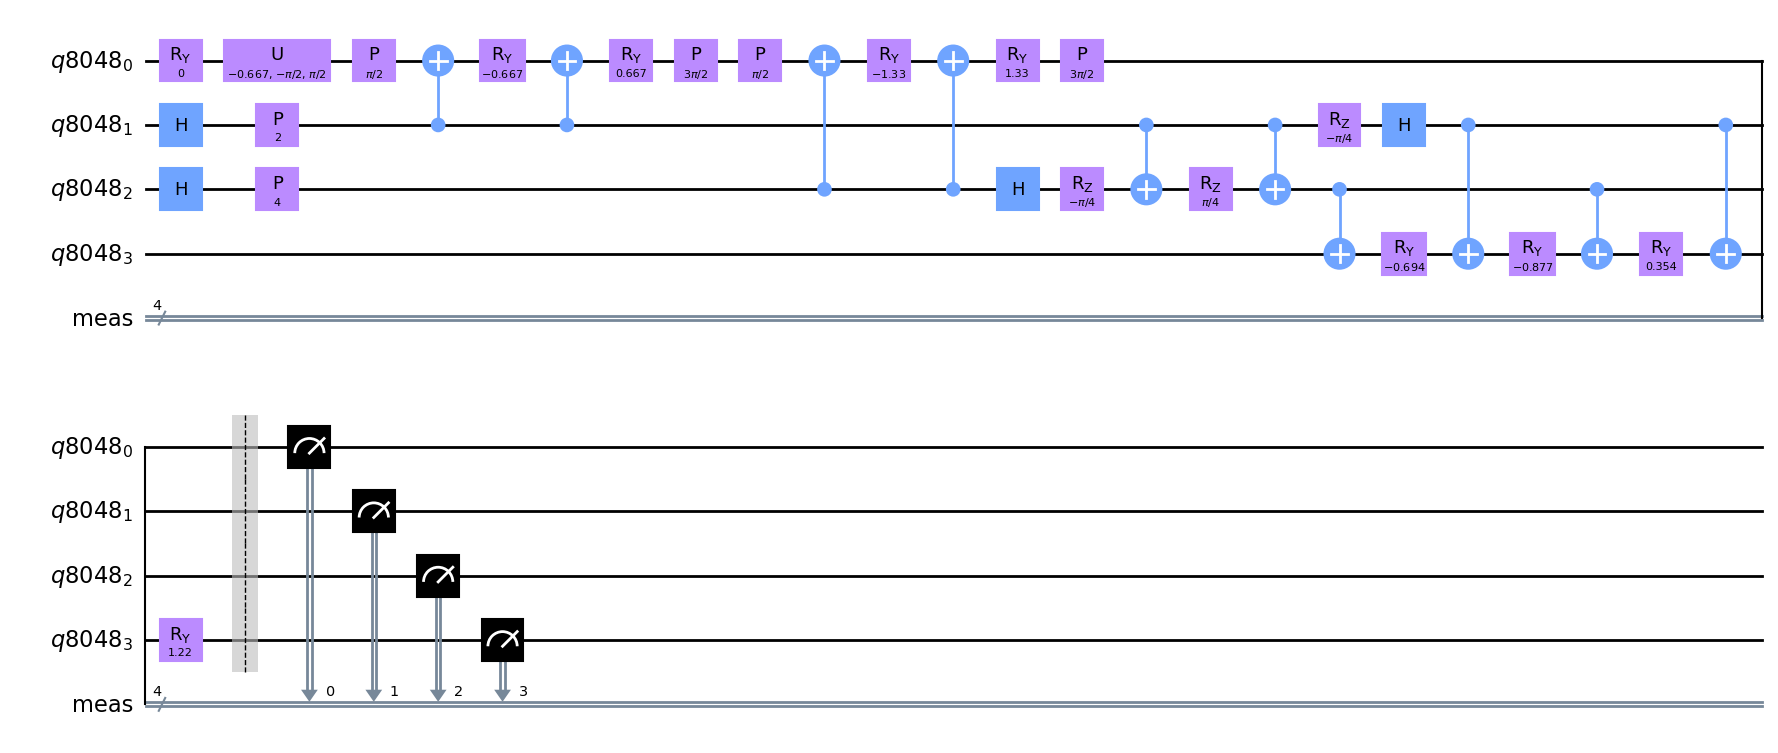

In [18]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

nqubits = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(nqubits)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation. 
qc.ry(2*theta, qrb[0])
    
# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
qc.draw('mpl')

In [19]:
from qiskit import ClassicalRegister, IBMQ
from qiskit.compiler import transpile
from qiskit.utils.mitigation import (complete_meas_cal,
                                     CompleteMeasFitter)

from qiskit.providers.fake_provider import FakeYorktown
backend = FakeYorktown()
layout = [2,3,0,4]
chip_qubits = 5

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend, initial_layout=layout)

In [20]:
meas_cals, state_labels = complete_meas_cal(qubit_list=layout, qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=10)

In [21]:
import qiskit.tools.jupyter
%qiskit_version_table